In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ASDS/Dialog_2009_2023_Daily_Stock.csv')

In [ ]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %,RTX,TEC,YTS,UPF
0,7/8/2009,5.25,5.25,5.25,5.00,714.20K,0.00%,0.579197,0.443872,0.583657,0.813441
1,7/9/2009,5.25,5.25,5.25,5.00,386.70K,0.00%,0.051523,0.454890,0.597551,0.779019
2,7/13/2009,5.25,5.25,5.25,5.00,290.90K,0.00%,0.086485,0.372876,0.894992,0.056125
3,7/14/2009,5.25,5.25,5.25,5.25,163.60K,0.00%,0.601138,0.243800,0.259723,0.665579
4,7/15/2009,5.25,5.25,5.25,5.00,63.10K,0.00%,0.591252,0.782633,0.472769,0.776176
5,7/16/2009,5.00,5.25,5.50,5.00,226.30K,-4.76%,0.997851,0.026496,0.023913,0.694266
6,7/17/2009,5.25,5.25,5.50,5.25,646.20K,5.00%,0.687691,0.745816,0.177377,0.793747
7,7/20/2009,5.25,5.50,5.50,5.25,198.30K,0.00%,0.807868,0.684280,0.437519,0.950369
8,7/21/2009,5.25,5.50,5.50,5.25,11.87M,0.00%,0.529347,0.215976,0.844942,0.697998
9,7/22/2009,5.34,5.25,5.50,5.25,20.10K,1.71%,0.071022,0.653568,0.532320,0.223340


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3268 non-null   object 
 1   Price     3258 non-null   float64
 2   Open      3249 non-null   float64
 3   High      3256 non-null   float64
 4   Low       3255 non-null   float64
 5   Vol.      3257 non-null   object 
 6   Change %  3253 non-null   object 
 7   RTX       3268 non-null   float64
 8   TEC       3267 non-null   float64
 9   YTS       3268 non-null   float64
 10  UPF       3268 non-null   float64
dtypes: float64(8), object(3)
memory usage: 281.0+ KB


In [ ]:
df.describe()

,Price,Open,High,Low,RTX,TEC,YTS,UPF
count,3258.000000,3249.000000,3256.000000,3255.000000,3268.000000,3267.000000,3268.000000,3268.000000
mean,10.280798,10.295629,10.407740,10.160138,0.486895,0.494452,0.499004,0.510361
std,2.021623,2.021084,2.017667,2.022015,0.288629,0.288079,0.288944,0.290623
min,5.000000,5.200000,5.250000,5.000000,0.000164,0.000049,0.000214,0.000469
25%,8.900000,8.900000,9.000000,8.700000,0.232562,0.243155,0.243098,0.256494
50%,10.600000,10.600000,10.700000,10.500000,0.482072,0.490771,0.501667,0.520496
75%,11.600000,11.700000,11.800000,11.500000,0.739898,0.743403,0.744098,0.763626
max,14.800000,14.700000,14.800000,14.500000,0.999880,0.999942,0.999744,0.999867


In [ ]:
df.isnull().sum()

,0
Date,0
Price,10
Open,19
High,12
Low,13
Vol.,11
Change %,15
RTX,0
TEC,1
YTS,0


In [ ]:
df.fillna(method= 'ffill', inplace=True)

<ipython-input-9-543a9ae196df>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method= 'ffill', inplace=True)


In [ ]:
df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0
RTX,0
TEC,0
YTS,0


In [ ]:
df = df.drop(columns=['RTX','YTS','UPF','TEC'])

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,7/8/2009,5.25,5.25,5.25,5.00,714.20K,0.00%
1,7/9/2009,5.25,5.25,5.25,5.00,386.70K,0.00%
2,7/13/2009,5.25,5.25,5.25,5.00,290.90K,0.00%
3,7/14/2009,5.25,5.25,5.25,5.25,163.60K,0.00%
4,7/15/2009,5.25,5.25,5.25,5.00,63.10K,0.00%


In [ ]:
# Check if we need to convert any columns
# Convert Date to datetime if it's not already
if 'Date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Check if Volume column needs cleaning (it might have 'K' or 'M' suffixes)
if 'Vol.' in df.columns:
    # Rename to 'Volume' for clarity
    df = df.rename(columns={'Vol.': 'Volume'})

    # Convert Volume to numeric if it's not already
    if not pd.api.types.is_numeric_dtype(df['Volume']):
        # Function to convert volume strings to numeric
        def convert_volume(vol_str):
            if isinstance(vol_str, str):
                if 'K' in vol_str:
                    return float(vol_str.replace('K', '')) * 1000
                elif 'M' in vol_str:
                    return float(vol_str.replace('M', '')) * 1000000
                else:
                    return float(vol_str)
            return vol_str

        df['Volume'] = df['Volume'].apply(convert_volume)

In [ ]:
# Convert Change % to numeric if needed
if 'Change %' in df.columns:
    # Rename to 'Change_pct' for easier handling
    df = df.rename(columns={'Change %': 'Change_pct'})

    # Convert to numeric if it's not already
    if not pd.api.types.is_numeric_dtype(df['Change_pct']):
        df['Change_pct'] = df['Change_pct'].str.replace('%', '').astype(float) / 100
        print("\
Change_pct column cleaned and converted to numeric")

print(df.head())

Change_pct column cleaned and converted to numeric
        Date  Price  Open  High   Low    Volume  Change_pct
0 2009-07-08   5.25  5.25  5.25  5.00  714200.0         0.0
1 2009-07-09   5.25  5.25  5.25  5.00  386700.0         0.0
2 2009-07-13   5.25  5.25  5.25  5.00  290900.0         0.0
3 2009-07-14   5.25  5.25  5.25  5.25  163600.0         0.0
4 2009-07-15   5.25  5.25  5.25  5.00   63100.0         0.0


In [ ]:
df2 = df

# Hypothesis Test

In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:

# 1. Data Split (COVID Focus)
# Define before and after COVID ranges
before_covid = df[(df['Date'] >= '2009-01-01') & (df['Date'] <= '2019-12-31')]['Price'].dropna()
after_covid = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2023-12-31')]['Price'].dropna()


In [ ]:
# 2. Shapiro-Wilk Normality Test
shapiro_before = shapiro(before_covid)
shapiro_after = shapiro(after_covid)


In [ ]:
# 3. Independent t-test
t_stat, t_p_value = ttest_ind(before_covid, after_covid, equal_var=False)


In [ ]:
#  4. Mann–Whitney U Test
u_stat, u_p_value = mannwhitneyu(before_covid, after_covid, alternative='two-sided')


In [ ]:
# 5. Display Results
print(" Shapiro-Wilk Test for Normality")
print(f"Before COVID: Statistic = {shapiro_before.statistic:.4f}, p = {shapiro_before.pvalue:.4e}")
print(f"After COVID:  Statistic = {shapiro_after.statistic:.4f}, p = {shapiro_after.pvalue:.4e}")
print("Interpretation: p < 0.05 means the data is NOT normally distributed.\n")


 Shapiro-Wilk Test for Normality
Before COVID: Statistic = 0.9850, p = 1.1128e-15
After COVID:  Statistic = 0.9362, p = 2.3766e-17
Interpretation: p < 0.05 means the data is NOT normally distributed.



In [ ]:
print(" Independent t-test")
print(f"t-statistic = {t_stat:.4f}, p-value = {t_p_value:.4e}")
print("Interpretation: Valid only if data is normally distributed.\n")

 Independent t-test
t-statistic = -10.6340, p-value = 1.2118e-25
Interpretation: Valid only if data is normally distributed.



In [ ]:
print(" Mann–Whitney U Test")
print(f"U-statistic = {u_stat:.4f}, p-value = {u_p_value:.4e}")
print("Interpretation: Non-parametric test. p < 0.05 means significant difference in distributions.\n")

 Mann–Whitney U Test
U-statistic = 751908.5000, p-value = 4.0534e-17
Interpretation: Non-parametric test. p < 0.05 means significant difference in distributions.



In [ ]:
# Add a column for 'Period'
df['Period'] = df['Date'].apply(lambda x: 'Before COVID' if x <= pd.to_datetime('2019-12-31') else 'After COVID')

# 1. Box Plot (Comparison)-
fig1 = px.box(df, x='Period', y='Price', color='Period',
              title=' Stock Price Comparison: Before vs After COVID',
              labels={'Price': 'Stock Price (LKR)'})

fig1.update_layout(showlegend=False,
                   annotations=[dict(text="Box plot shows median, spread & outliers",
                                     x=0.5, y=1.1, showarrow=False,
                                     font=dict(size=12))])
fig1.show()


In [ ]:
# Histogram + Box with clearer design
fig2 = px.histogram(df,
                    x="Price",
                    color="Period",
                    marginal="box",
                    nbins=100,
                    opacity=0.65,
                    barmode='overlay',
                    title="Dialog Stock Price Distribution (Before vs After COVID)",
                    labels={'Price': 'Stock Price (LKR)'},
                    template='plotly_white')

# Layout tweaks for clarity
fig2.update_layout(
    font=dict(size=14),
    legend_title_text='Period',
    legend=dict(orientation="h", y=1.05, x=1, xanchor='right', yanchor='bottom'),
    xaxis=dict(title="Stock Price (LKR)", showgrid=True),
    yaxis=dict(title="Frequency", showgrid=True),
    margin=dict(l=40, r=40, t=80, b=40)
)

# Clear manual annotation instead of problematic auto-placement
fig2.add_annotation(
    x=df['Price'].median(),
    y=0.9 * df['Price'].value_counts().max(),
    text=" Overlapping bars highlight distribution differences between periods.",
    showarrow=False,
    font=dict(size=13),
    align="center",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1
)

fig2.show()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Price']].dropna()

# Add COVID period label
df['Period'] = df['Date'].apply(lambda x: 'Before COVID' if x <= pd.to_datetime('2019-12-31') else 'After COVID')

# Create the line chart
fig3 = px.line(df, x="Date", y="Price", color='Period',
               title="Dialog Stock Price Trend (2009–2023)",
               labels={'Price': 'Stock Price (LKR)', 'Date': 'Date'},
               template='plotly_white')

# Line and marker styling
fig3.update_traces(mode='lines+markers',
                   line=dict(width=2),
                   marker=dict(size=4, symbol='circle'))

# Add vertical line manually using add_shape (avoid type errors)
covid_start = pd.to_datetime('2020-01-01')
fig3.add_shape(
    type="line",
    x0=covid_start, y0=df['Price'].min(),
    x1=covid_start, y1=df['Price'].max(),
    line=dict(color="red", width=2, dash="dash"),
)

# Add annotation manually
fig3.add_annotation(
    x=covid_start,
    y=df['Price'].max(),
    text="🦠 COVID Onset",
    showarrow=True,
    arrowhead=2,
    ax=40,
    ay=-40,
    font=dict(size=12, color="red"),
    bgcolor="white",
    bordercolor="red",
    borderwidth=1
)

# Layout update
fig3.update_layout(
    hovermode="x unified",
    font=dict(size=14),
    legend=dict(title='Period', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    xaxis=dict(title='Date', showgrid=True),
    yaxis=dict(title='Stock Price (LKR)', showgrid=True),
    margin=dict(l=40, r=40, t=80, b=40)
)

fig3.show()


In [ ]:
# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add Period column
df['Period'] = df['Date'].apply(lambda x: 'Before COVID' if x <= pd.to_datetime('2019-12-31') else 'After COVID')

# Split data
before = df[df['Period'] == 'Before COVID']['Price']
after = df[df['Period'] == 'After COVID']['Price']

# Mann-Whitney U Test results (example)
u_statistic = 751908.5000
p_value = 4.0534e-17

# Create Box + Violin Combo Plot
fig = go.Figure()

# Box plot for Before
fig.add_trace(go.Box(y=before, name="Before COVID", boxpoints='outliers',
                     marker_color='blue', line=dict(width=2),
                     boxmean='sd'))

# Violin plot for Before
fig.add_trace(go.Violin(y=before, name="Before COVID", side='negative', line_color='blue',
                        spanmode='hard', showlegend=False, opacity=0.4))

# Box plot for After
fig.add_trace(go.Box(y=after, name="After COVID", boxpoints='outliers',
                     marker_color='orange', line=dict(width=2),
                     boxmean='sd'))

# Violin plot for After
fig.add_trace(go.Violin(y=after, name="After COVID", side='positive', line_color='orange',
                        spanmode='hard', showlegend=False, opacity=0.4))

# Layout with enhanced annotations for test results
fig.update_layout(
    title="Stock Price Comparison: Before vs After COVID (Mann–Whitney U Test)",
    yaxis_title="Stock Price (LKR)",
    violingap=0,
    violinmode='overlay',
    boxmode='group',
    font=dict(size=14),
    annotations=[
        dict(
            text=f"Mann–Whitney U Test: U-statistic = {u_statistic:.4f}, p-value = {p_value:.4e}\nStatistically significant difference (p < 0.05)",
            x=0.5, y=1.12, xref='paper', yref='paper',
            showarrow=False, font=dict(size=13),
            align="center",
            bgcolor="rgba(255,255,255,0.9)",
            bordercolor="gray", borderwidth=1
        ),
        dict(
            text=" Data is non-normally distributed (Shapiro-Wilk test p < 0.05)",
            x=0.5, y=1.06, xref='paper', yref='paper',
            showarrow=False, font=dict(size=12),
            align="center",
            bgcolor="rgba(255,255,255,0.9)",
            bordercolor="gray", borderwidth=1
        )
    ],
    template='plotly_white',
    margin=dict(l=40, r=40, t=100, b=40)
)

fig.show()


# Linear Regression

In [ ]:
# Load and preprocess data
df = df2
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Price', 'High']].dropna()

In [ ]:
# Split into training and testing
train_df = df[(df['Date'] >= '2010-01-01') & (df['Date'] <= '2018-12-31')]
test_df = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2023-12-31')]

X_train = train_df[['High']]
y_train = train_df['Price']
X_test = test_df[['High']]
y_test = test_df['Price']


In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Add constant for intercept term
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Model Summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.821e+05
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        09:29:58   Log-Likelihood:                 956.56
No. Observations:                2160   AIC:                            -1909.
Df Residuals:                    2158   BIC:                            -1898.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0933      0.017     -5.457      0.0

In [ ]:
# Combine X and y into one DataFrame for formula interface
train_df_formula = train_df[['High', 'Price']]

# Fit formula-based model
ols_model = smf.ols('Price ~ High', data=train_df_formula).fit()


In [ ]:
# ANOVA table
anova_table = anova_lm(ols_model)
print("\n🔍 ANOVA Table:")
print(anova_table)


🔍 ANOVA Table:
              df       sum_sq      mean_sq             F  PR(>F)
High         1.0  9234.165577  9234.165577  382054.21451     0.0
Residual  2158.0    52.158381     0.024170           NaN     NaN


In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred)**0.5

print(f"R-squared (Train 2010–2018): {r2_train:.4f}")
print(f"R-squared (Test 2019–2023): {r2_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")

R-squared (Train 2010–2018): 0.9944
R-squared (Test 2019–2023): 0.9939
RMSE (Test): 0.1123


In [ ]:
# Interactive Plot
fig = go.Figure()

# Train points
fig.add_trace(go.Scatter(x=X_train['High'], y=y_train,
                         mode='markers',
                         name='2010–2018 (Train)',
                         marker=dict(color='blue', size=6),
                         hovertemplate='High: %{x}<br>Price: %{y}<extra></extra>'))

# Train line
fig.add_trace(go.Scatter(x=X_train['High'], y=y_pred_train,
                         mode='lines',
                         name='Regression Line (Train)',
                         line=dict(color='darkblue', width=2)))

# Test points
fig.add_trace(go.Scatter(x=X_test['High'], y=y_test,
                         mode='markers',
                         name='2019–2023 (Actual)',
                         marker=dict(color='orange', size=6),
                         hovertemplate='High: %{x}<br>Price: %{y}<extra></extra>'))

# Prediction line
fig.add_trace(go.Scatter(x=X_test['High'], y=y_pred_test,
                         mode='lines',
                         name='Prediction Line (Test)',
                         line=dict(color='red', width=2, dash='dash')))

# Layout
fig.update_layout(
    title=(
        f" Linear Regression: Predicting Close Price from High Price<br>"
        f" R² Train: {r2_train:.3f} |  R² Test: {r2_test:.3f} | RMSE: {rmse_test:.2f}"
    ),
    xaxis_title='High Price',
    yaxis_title='Close Price (Price)',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99),
    hovermode='closest',
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()


In [ ]:
# Convert date to datetime
df2['Date'] = pd.to_datetime(df2['Date'])
# Drop rows with missing values
df = df2[['Date', 'Price', 'Open', 'High', 'Low', 'Volume']].dropna()


In [ ]:
# Split into before and after 2015
before_2015 = df[df['Date'] < '2015-01-01']
after_2015 = df[df['Date'] >= '2015-01-01']

In [ ]:
# Features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Price'

X_train = before_2015[features]
y_train = before_2015[target]

X_test = after_2015[features]
y_test = after_2015[target]


In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy metrics
r2 = r2_score(y_test, y_pred)
# Calculate RMSE without 'squared' argument if using older scikit-learn version
rmse = mean_squared_error(y_test, y_pred)**0.5 # or np.sqrt if numpy is imported

print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared: 0.9958
RMSE: 0.0930


In [ ]:
# Create interactive figure
fig = go.Figure()

# Actual Price Line – Solid Blue
fig.add_trace(go.Scatter(
    x=after_2015['Date'], y=y_test,
    mode='lines',
    name='Actual Price',
    line=dict(color='royalblue', width=2),
    hovertemplate='Date: %{x|%Y-%m-%d}<br>Actual: %{y:.2f}<extra></extra>'
))

# Predicted Price Line – Solid Crimson
fig.add_trace(go.Scatter(
    x=after_2015['Date'], y=y_pred,
    mode='lines',
    name='Predicted Price',
    line=dict(color='crimson', width=2),
    hovertemplate='Date: %{x|%Y-%m-%d}<br>Predicted: %{y:.2f}<extra></extra>'
))

# Layout updates
fig.update_layout(
    title=' Actual vs Predicted Stock Price (2015–2023)',
    xaxis_title=' Date',
    yaxis_title=' Stock Price (LKR)',
    hovermode='x unified',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0.5)'),
    margin=dict(l=40, r=40, t=60, b=40),
    annotations=[
        dict(
            text="Actual and predicted prices",
            x=0.5, y=1.1, xref='paper', yref='paper',
            showarrow=False, font=dict(size=13),
            bgcolor="rgba(255,255,255,0.95)", bordercolor="gray", borderwidth=1
        )
    ]
)

fig.show()


# Time Series Analysis (ARIMA & SARIMA)

In [ ]:
# Load your dataset
df = df2
df['Date'] = pd.to_datetime(df['Date'])

# Set date and resample monthly
df.set_index('Date', inplace=True)
monthly_data = df['Price'].resample('M').mean().dropna()

# Train-test split
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data[:train_size], monthly_data[train_size:]

# Fit ARIMA model
arima_model = ARIMA(train, order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=len(test))

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.forecast(steps=len(test))


<ipython-input-43-dd091ca04128>:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.


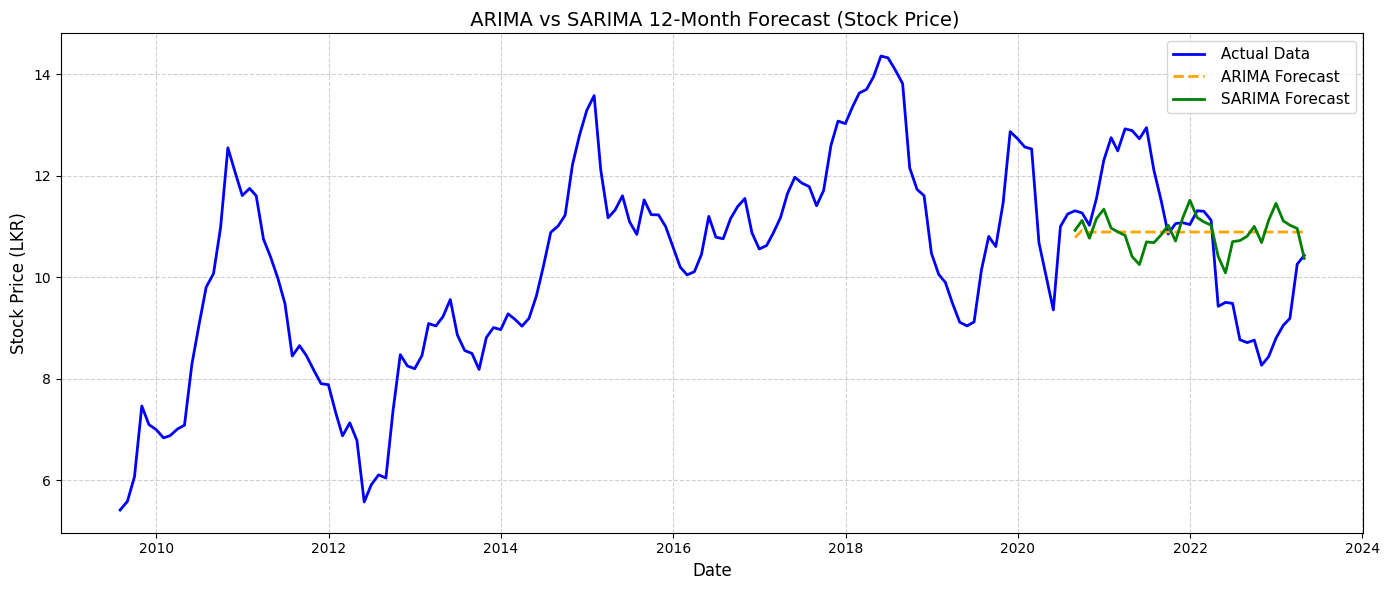

In [ ]:
# Plotting ARIMA vs SARIMA Forecast
plt.figure(figsize=(14,6))

# Actual historical values
plt.plot(monthly_data, label=' Actual Data', color='blue', linewidth=2)

# ARIMA Forecast
plt.plot(test.index, arima_forecast, label=' ARIMA Forecast', color='orange', linestyle='--', linewidth=2)

# SARIMA Forecast
plt.plot(test.index, sarima_forecast, label=' SARIMA Forecast', color='green', linestyle='-', linewidth=2)

# Styling
plt.title(' ARIMA vs SARIMA 12-Month Forecast (Stock Price)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (LKR)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Check stationarity using ADF test
adf_result = adfuller(monthly_data)
print("ADF Test Statistic:", round(adf_result[0], 4))
print("p-value:", round(adf_result[1], 4))
print("Is Stationary:", adf_result[1] < 0.05)

# First differencing if non-stationary
monthly_diff = monthly_data.diff().dropna()

ADF Test Statistic: -3.1162
p-value: 0.0254
Is Stationary: True


In [ ]:
# Compute ACF and PACF
nlags = 30
acf_vals = acf(monthly_diff, nlags=nlags)
pacf_vals = pacf(monthly_diff, nlags=nlags)
lags = list(range(len(acf_vals)))

# Confidence interval threshold (95%)
n = len(monthly_diff)
conf_level = 1.96 / np.sqrt(n)

# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("🔵 ACF Plot (1st Differenced)", "🟣 PACF Plot (1st Differenced)"))

# ACF bars
fig.add_trace(go.Bar(
    x=lags, y=acf_vals,
    name="ACF",
    marker_color='royalblue',
    hovertemplate='Lag: %{x}<br>ACF: %{y:.2f}<extra></extra>'
), row=1, col=1)

# PACF bars
fig.add_trace(go.Bar(
    x=lags, y=pacf_vals,
    name="PACF",
    marker_color='darkorchid',
    hovertemplate='Lag: %{x}<br>PACF: %{y:.2f}<extra></extra>'
), row=2, col=1)

# Add confidence interval lines for both ACF and PACF
for row in [1, 2]:
    fig.add_hline(y=conf_level, line_dash="dot", line_color="gray", row=row, col=1)
    fig.add_hline(y=-conf_level, line_dash="dot", line_color="gray", row=row, col=1)
    fig.add_hline(y=0, line_color="black", row=row, col=1)

# Layout updates
fig.update_layout(
    height=600,
    title_text="📊 ACF & PACF (1st Differenced) with 95% Confidence Bands",
    template="plotly_white",
    showlegend=False
)

fig.update_xaxes(title_text="Lag", row=2, col=1)
fig.update_yaxes(title_text="ACF", row=1, col=1)
fig.update_yaxes(title_text="PACF", row=2, col=1)

fig.show()


In [ ]:
# Fit SARIMA model (Seasonal ARIMA)
# SARIMA(p,d,q)(P,D,Q,s) where s=12 for monthly data with yearly seasonality
sarima_model = SARIMAX(monthly_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Print model summary
print(sarima_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  165
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -127.887
Date:                            Sun, 11 May 2025   AIC                            265.775
Time:                                    09:30:01   BIC                            280.894
Sample:                                         0   HQIC                           271.917
                                            - 165                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2548      0.165     -1.548      0.122      -0.577       0.068
ma.L1          0.6810      0.124   

In [ ]:
# Forecast next 12 months
forecast = sarima_fit.get_forecast(steps=12)

# Generate forecast dates
forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Get predicted values and confidence intervals
sarima_predicted_values = forecast.predicted_mean
sarima_conf_int = forecast.conf_int()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

<ipython-input-49-c8cf060b0ca9>:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
# Split the data into training and test sets (last 12 months as test)
train_data = monthly_data[:-12]
test_data = monthly_data[-12:]

# Fit the SARIMA model on the training data
sarima_model_train = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit_train = sarima_model_train.fit()

# Get the predictions on the test data (next 12 months)
forecast_train = sarima_fit_train.get_forecast(steps=12)
forecast_train_values = forecast_train.predicted_mean

# Ensure that forecast values and test values are aligned (same index)
forecast_train_values.index = test_data.index  # Align predicted values with the test data index

# Calculate errors (MAE, MAPE, RMSE)
mae = np.mean(np.abs(forecast_train_values - test_data))
mape = np.mean(np.abs((forecast_train_values - test_data) / test_data)) * 100
rmse = np.sqrt(np.mean((forecast_train_values - test_data) ** 2))

# Calculate accuracy percentage
accuracy_percentage = 100 - mape

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [ ]:
# Print error metrics
print(f"Model Accuracy (SARIMA) for the Next 12 Months:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"Accuracy: {accuracy_percentage:.2f}%")


Model Accuracy (SARIMA) for the Next 12 Months:
MAE (Mean Absolute Error): 0.68
MAPE (Mean Absolute Percentage Error): 7.43%
RMSE (Root Mean Squared Error): 0.76
Accuracy: 92.57%


In [ ]:
# Forecasted values DataFrame with rounded values
forecast_sarima_df = pd.DataFrame({
    'Date': forecast_index.strftime('%Y-%m'),
    'SARIMA Forecasted Price': np.round(sarima_predicted_values, 2)  # Using np.round to round each value
})

print("\nSARIMA 12-Month Forecast:")
print(forecast_sarima_df)


SARIMA 12-Month Forecast:
        Date  SARIMA Forecasted Price
165  2023-05                    10.28
166  2023-06                    10.67
167  2023-07                    10.41
168  2023-08                    10.39
169  2023-09                    10.37
170  2023-10                    10.20
171  2023-11                    10.57
172  2023-12                    10.86
173  2024-01                    10.86
174  2024-02                    10.80
175  2024-03                    10.94
176  2024-04                    10.37


In [ ]:
# Create interactive figure
fig = go.Figure()

# Historical data
fig.add_trace(go.Scatter(
    x=monthly_data.index, y=monthly_data.values,
    mode='lines',
    name='Historical Data',
    line=dict(color='royalblue'),
    hovertemplate='Date: %{x|%Y-%m}<br>Price: %{y:.2f}<extra></extra>'
))

# SARIMA forecast (no markers)
fig.add_trace(go.Scatter(
    x=forecast_index, y=sarima_predicted_values,
    mode='lines',  # Removed markers
    name=' SARIMA Forecast',
    line=dict(color='crimson'),
    hovertemplate='Date: %{x|%Y-%m}<br>Forecast: %{y:.2f}<extra></extra>'
))

# SARIMA confidence interval (shaded area)
fig.add_trace(go.Scatter(
    x=forecast_index.tolist() + forecast_index[::-1].tolist(),
    y=sarima_conf_int.iloc[:, 0].tolist() + sarima_conf_int.iloc[:, 1][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(220,20,60,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    name='Confidence Interval'
))

# Layout
fig.update_layout(
    title='SARIMA 12-Month Stock Price Forecast',
    xaxis_title='Date',
    yaxis_title='Stock Price (LKR)',
    hovermode='x unified',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99),
    margin=dict(l=40, r=40, t=60, b=40),
    annotations=[
        dict(
            text="SARIMA forecast confidence interval",
            x=0.5, y=1.12, xref='paper', yref='paper',
            showarrow=False, font=dict(size=13),
            bgcolor="rgba(255,255,255,0.95)", bordercolor="gray", borderwidth=1
        )
    ]
)

fig.show()
